In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

train = pd.read_csv('E:/personal_projects/competitive-data-science-predict-future-sales/sales_train.csv')

items = pd.read_csv('E:/personal_projects/competitive-data-science-predict-future-sales/items.csv')
categories = pd.read_csv('E:/personal_projects/competitive-data-science-predict-future-sales/item_categories.csv')
shops = pd.read_csv('E:/personal_projects/competitive-data-science-predict-future-sales/shops.csv')

In [2]:
test = pd.read_csv('E:/personal_projects/competitive-data-science-predict-future-sales/test.csv')


In [3]:
import datetime , nltk

In [4]:
train['date'] = pd.to_datetime(train['date'], format = "%d.%m.%Y")

In [5]:
train['year'] = train['date'].dt.year

In [6]:
train['month'] = train['date'].dt.month

In [7]:
train.drop(['date'], inplace = True , axis = 1)

In [8]:
train = train.groupby([c for c in train.columns if c not in ['item_cnt_day'] ], as_index = False)['item_cnt_day'].sum()

In [10]:
train = train.rename(columns = {'item_cnt_day' : 'item_cnt_month'})

In [11]:
## mean of sales per product per shop
train_mean_month = train [['shop_id','item_id','item_cnt_month']].groupby(['shop_id','item_id'], as_index=False)[['item_cnt_month']].mean()


In [12]:
train_mean_month= train_mean_month.rename(columns = {'item_cnt_month' : 'item_mean_month'})

In [13]:
train= pd.merge(train , train_mean_month , how = 'left' ,on = ['shop_id' ,'item_id'] )

In [14]:
shop_prev_month = train [train['date_block_num'] == 33 ][['shop_id' ,'item_id' ,'date_block_num','item_cnt_month'] ]


In [18]:
shop_prev_month = shop_prev_month.groupby(['item_id' , 'shop_id'] , as_index= False)['item_cnt_month'].sum()

In [19]:
shop_prev_month = shop_prev_month.rename(columns = {'item_cnt_month' : 'item_cnt_prev_month'})


In [20]:
shop_prev_month

,item_id,shop_id,item_cnt_prev_month
0,30,31,1.0
1,31,2,1.0
2,31,6,2.0
3,31,18,1.0
4,31,21,1.0
...,...,...,...
31526,22167,28,1.0
31527,22167,37,1.0
31528,22167,42,4.0
31529,22167,47,1.0


In [21]:
train.shape

(1739022, 8)

In [22]:
train= pd.merge(train , shop_prev_month , how = 'left' ,on = ['shop_id' ,'item_id'] )
train.shape

(1739022, 9)

In [23]:
train = train.fillna(0.)
train.shape


(1739022, 9)

In [24]:
## Adding now all the features : 
train =  pd.merge (train ,  items , how  = 'left',on = ['item_id'])

In [25]:
train =  pd.merge (train ,  categories , how  = 'left',on = ['item_category_id'])

In [26]:
train =  pd.merge (train ,  shops , how  = 'left',on = ['shop_id'])

In [27]:
test['month'] = 11 

In [28]:
test = pd.merge (test ,  items , how  = 'left',on = ['item_id'])

In [29]:
test =  pd.merge (test,  categories , how  = 'left',on = ['item_category_id'])

In [30]:
test = pd.merge ( test,  shops , how  = 'left',on = ['shop_id'])

In [31]:
test['year'] = 2015

In [32]:
test ['date_block_num'] = 34
test.shape
test

,ID,shop_id,item_id,month,item_name,item_category_id,item_category_name,shop_name,year,date_block_num
0,0,5,5037,11,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015,34
1,1,5,5320,11,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад""",2015,34
2,2,5,5233,11,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015,34
3,3,5,5232,11,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,"Вологда ТРЦ ""Мармелад""",2015,34
4,4,5,5268,11,"Need for Speed [PS4, русская версия]",20,Игры - PS4,"Вологда ТРЦ ""Мармелад""",2015,34
...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,11,СБ. Союз 55,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015,34
214196,214196,45,16188,11,Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры,"Самара ТЦ ""ПаркХаус""",2015,34
214197,214197,45,15757,11,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015,34
214198,214198,45,19648,11,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD,"Самара ТЦ ""ПаркХаус""",2015,34


In [33]:
test= pd.merge(test, shop_prev_month, how = 'left' ,on = ['item_id' , 'shop_id'] ).fillna(0.)
test



,ID,shop_id,item_id,month,item_name,item_category_id,item_category_name,shop_name,year,date_block_num,item_cnt_prev_month
0,0,5,5037,11,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015,34,0.0
1,1,5,5320,11,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад""",2015,34,0.0
2,2,5,5233,11,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015,34,1.0
3,3,5,5232,11,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,"Вологда ТРЦ ""Мармелад""",2015,34,0.0
4,4,5,5268,11,"Need for Speed [PS4, русская версия]",20,Игры - PS4,"Вологда ТРЦ ""Мармелад""",2015,34,0.0
...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,11,СБ. Союз 55,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015,34,1.0
214196,214196,45,16188,11,Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры,"Самара ТЦ ""ПаркХаус""",2015,34,0.0
214197,214197,45,15757,11,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015,34,0.0
214198,214198,45,19648,11,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD,"Самара ТЦ ""ПаркХаус""",2015,34,0.0


In [34]:
test= pd.merge(test , train_mean_month , how = 'left' ,on = ['item_id' , 'shop_id'] )

In [35]:
test = test.fillna(0.)

In [245]:
test['item_cnt_month'] = 0.

In [36]:
from sklearn import preprocessing
for c in ['item_name' , 'item_category_name' , 'shop_name'] :
    e = preprocessing.LabelEncoder()
    e.fit(list(train[c].unique()) + list(test[c].unique()))
    train[c] = e.transform(train[c].astype(str))
    test[c] = e.transform(test[c].astype(str))
    print(c)

item_name
item_category_name
shop_name


In [37]:
train ['item_cnt_month']

0          6.0
1          3.0
2          1.0
3          1.0
4          1.0
          ... 
1739017    6.0
1739018    2.0
1739019    1.0
1739020    1.0
1739021    1.0
Name: item_cnt_month, Length: 1739022, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train = train [train['date_block_num']<33]
y_train = train [train['date_block_num']<33] ['item_cnt_month']
X_test = train [train['date_block_num']==33]
y_test = X_test['item_cnt_month'].clip(0. , 20.)


In [71]:
X_train.shape

(1705824, 12)

In [72]:
y_train.shape

(1705824,)

In [79]:
X_train = X_train.drop(['item_cnt_month'], axis = 1)
X_test = X_test.drop(['item_cnt_month'], axis = 1)


In [99]:
##Deep learning part : 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

In [101]:
##Starting with the model 

model = Sequential()
##input layer
model.add(Dense(56, activation='relu', input_shape= (X_train.shape[1],)))
##hidden layer
model.add(Dense(128, activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu',kernel_initializer='normal'))
##Output layer 
model.add( Dense (1, activation='linear',kernel_initializer='normal'))

model.compile(loss='MAE', optimizer ='adam' , metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 56)                672       
_________________________________________________________________
dense_61 (Dense)             (None, 128)               7296      
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_64 (Dense)             (None, 1)               

In [82]:
X_train.shape

(1705824, 11)

In [83]:
history = model.fit(X_train , y_train , batch_size = 56 , epochs = 10 , 
                validation_data =(X_test,y_test) )

Train on 1705824 samples, validate on 33198 samples
Epoch 1/10
1705824/1705824 [==============================] - 70s 41us/sample - loss: 1.1457 - mean_absolute_error: 1.1457 - val_loss: 0.9029 - val_mean_absolute_error: 0.9029
Epoch 2/10
1705824/1705824 [==============================] - 67s 39us/sample - loss: 1.1044 - mean_absolute_error: 1.1043 - val_loss: 0.9006 - val_mean_absolute_error: 0.9006
Epoch 3/10
1705824/1705824 [==============================] - 67s 39us/sample - loss: 1.1041 - mean_absolute_error: 1.1040 - val_loss: 0.8993 - val_mean_absolute_error: 0.8993
Epoch 4/10
1705824/1705824 [==============================] - 67s 39us/sample - loss: 1.1039 - mean_absolute_error: 1.1038 - val_loss: 0.8998 - val_mean_absolute_error: 0.8998
Epoch 5/10
1705824/1705824 [==============================] - 81s 48us/sample - loss: 1.1039 - mean_absolute_error: 1.1037 - val_loss: 0.9012 - val_mean_absolute_error: 0.9012
Epoch 6/10
1705824/1705824 [==============================] - 83s 49

In [84]:
model.evaluate(X_test,y_test)

33198/33198 [==============================] - 1s 18us/sample - loss: 0.8996 - mean_absolute_error: 0.8996


[0.8996321838033782, 0.8996327]

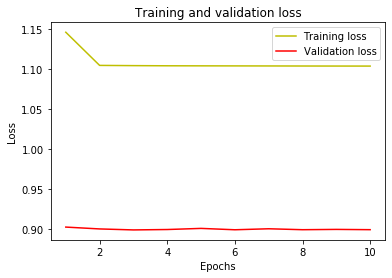

In [85]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

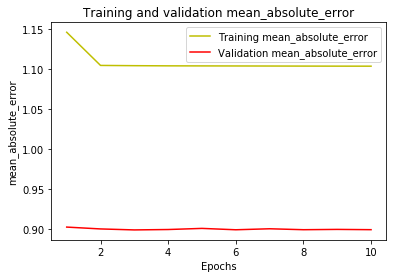

In [88]:
acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training mean_absolute_error')
plt.plot(epochs, val_acc, 'r', label='Validation mean_absolute_error')
plt.title('Training and validation mean_absolute_error')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_error')
plt.legend()
plt.show()

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID

In [91]:
test

,ID,shop_id,item_id,month,item_name,item_category_id,item_category_name,shop_name,year,date_block_num,item_cnt_prev_month,item_mean_month
0,0,5,5037,11,5037,19,19,5,2015,34,0.0,1.181818
1,1,5,5320,11,5320,55,55,5,2015,34,0.0,0.000000
2,2,5,5233,11,5233,19,19,5,2015,34,1.0,1.428571
3,3,5,5232,11,5232,23,23,5,2015,34,0.0,1.000000
4,4,5,5268,11,5268,20,20,5,2015,34,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,11,18454,55,55,45,2015,34,1.0,1.800000
214196,214196,45,16188,11,16188,64,64,45,2015,34,0.0,0.000000
214197,214197,45,15757,11,15757,55,55,45,2015,34,0.0,1.166667
214198,214198,45,19648,11,19648,40,40,45,2015,34,0.0,0.000000


In [92]:
sub = pd.DataFrame()
sub['ID'] = test.ID
test.drop(['ID'] , axis = 1 , inplace  = True)
sub['item_cnt_month'] = model.predict(test)

In [93]:
sub.to_csv('submissionnn.csv' , index = False)
